<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 一維資料

In [11]:
from typing import List,Dict
from collections import Counter
import math
import matplotlib.pyplot as plt

def bucketize(point:float,bucket_size:float)->float:
  """以floor的方式取整數，作為bucket_size的倍數"""
  return bucket_size * math.floor(point/bucket_size)

def make_histogram(points:List[float],bucket_size:float)->Dict[float,int]:
  """針對資料點進行分組，並計算每個分組各有幾個資料點"""
  return Counter(bucketize(point,bucket_size) for point in points)

def plot_histogram(points:List[float],bucket_size:float,title:str=""):
  histogram = make_histogram(points,bucket_size)
  plt.bar(histogram.keys(),histogram.values(),width=bucket_size)
  plt.title(title)

考慮以下兩組資料

In [16]:
import random

def normal_cdf(x:float,mu:float=0,sigma:float=1)->float:
  return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2
  
def inverse_normal_cdf(p:float,
            mu:float = 0,
            sigma:float=1,
            tolerance:float=0.00001) -> float:
  # 如果不是標準常態分佈，就先轉換成標準常態分佈
  if mu != 0 or sigma != 1:
    return mu + sigma*inverse_normal_cdf(p,tolerance = tolerance)
  
  low_z = -10.0 # normal_cdf(-10)是(趨近於) 0
  hi_z =  10.0 # normal_cdf(10)是(趨近於) 1
  while hi_z - low_z > tolerance:  
    mid_z = (low_z + hi_z) / 2   # 計算出中間值
    mid_p = normal_cdf(mid_z)     # 以及累積分佈函數在該處所應對的值
    if mid_p < p :
      low_z = mid_z        #中間的值太低，就往上繼續搜尋
    else:
      hi_z = mid_z        #中間的值太高，就往下繼續搜尋
  
  return mid_z

random.seed(0)

#介於-100到100之間的均勻分布
uniform= [200* random.random()-100 for _ in range(10000)]


#平均值0、標準差57的常態分佈
normal= [57* inverse_normal_cdf(random.random()) for _ in range(10000)]

### 圖10-1 均勻分布的直方圖



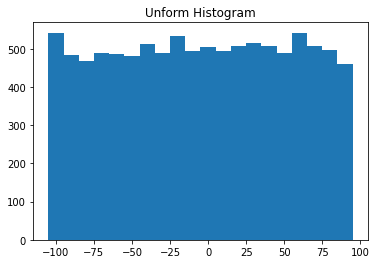

In [12]:
plot_histogram(uniform,10,"Unform Histogram")

### 圖10-2 常態分布的直方圖


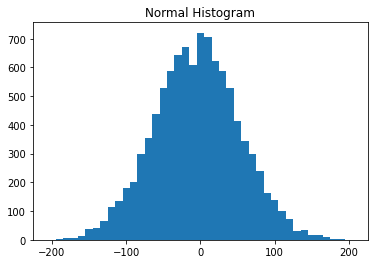

In [17]:
plot_histogram(normal,10,"Normal Histogram")

# 二維的資料

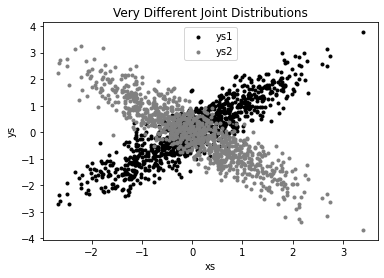

In [20]:
def random_normal()->float:
  """送回一個從標準常態分布中隨機選取的是數字"""
  return inverse_normal_cdf(random.random())

xs=[random_normal() for _ in range(1000)]
ys1 = [x+random_normal()/2 for x in xs]
ys2 = [-x+random_normal()/2 for x in xs]

plt.scatter(xs,ys1,marker=".",color="black",label="ys1")
plt.scatter(xs,ys2,marker=".",color="gray",label="ys2")
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [29]:
!pip install scratch

In [30]:
from scratch.statistics import correlation

print(correlation(xs,ys1))
print(correlation(xs,ys2))

ModuleNotFoundError: ignored